In [ ]:
# Linear Regression (선형회귀)
'''
선형회귀는 하나 이상의 특성과 연속적인 타깃 변수 사이의 관계를 모델링 하는 것
연속적인 출력 값을 예측하는 것
특성이 하나인 선형 모델 공식
Y = W0 + W1*X
where W0 : y축 절편, W1 : 특성의 가중치
✔ 목적 : 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치(W)를 학습하는 것

- 선형 회귀 모델의 훈련과 비용함수
모델의 훈련이란
✔ 모델이 훈련 데이터에 잘 맞도록 모델 파라미터를 설정하는 것
✔ 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함

모델 훈련에 필요한 비용함수 종류

✔ MSE (Mean Squared Error)
1. 회귀 모델의 주요 손실 함수
2. 참값과 예측값의 차이인 오차들의 제곱 평균으로 정의
3. 제곱을 해주기 때문에 이상치(outlier)에 민감
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2Fe2f84c43-a9db-4e98-bef9-b3bd87932ca2%2F4.png

✔ MAE (Mean Absolute Error)
1. 참값과 예측값의 차이인 오차들의 절대값 평균
2. MSE보다 이상치에 덜 민감
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F43d7ffdf-bd62-4b18-a2d8-7329a4d5015e%2F5.png

✔ RMSE (Root Mean Squared Error)
1. MSE에 root을 취해 준 것
2. 참값과 비슷한 값으로 변환하기 때문에 해석이 쉬워짐
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F8b234e87-ff6e-4744-9764-0181736f62ab%2F6.png

👍 보통 quadratic(2차 곡선형태) 형태의 미분 편의성이 좋기 때문에, 회귀 모형의 비용함수로 MSE를 많이 사용한다.

- 선형 회귀 모델의 최적화 방법
1.정규방정식

비용 함수를 최소화하는 θ 값을 찾기 위한 해석적 방법
정규방정식은 n개의 특성수에 따라서 (n+1) x (n+1)의 X XT 역행렬을 계산한다.
이 말은 특성의 수가 많아지면 정규방정식의 구현속도가 느려진다.
하지만 다행히도 모델의 복잡도가 훈련 세트의 샘플 수와 특성 수에 선형적으로 증가한다.
메모리 공간이 충분하다면 큰 훈련 세트도 효율적으로 처리 가능
비용함수(MSE)를 w에 대해 미분을 하면 아래와 같은 식이 나오게 된다.
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F0976b81c-5343-4f2f-8165-39a980321a34%2F1.jpg
'''

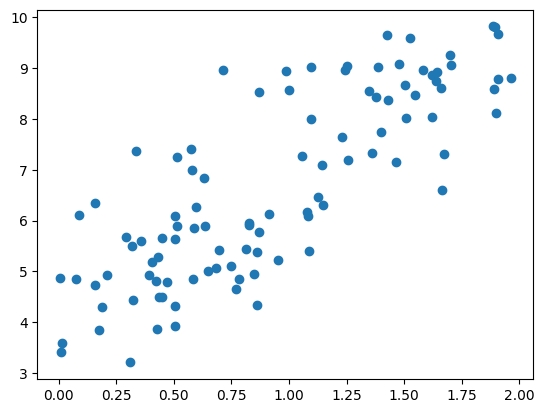

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = 2 * np.random.rand(100,1) # [0, 1) 범위에서 균일한 분포 100 X 1 array
y = 4 + 3*x + np.random.randn(100,1) # normal distribution(mu=0,var=1)분포 100 X 1 array
plt.scatter(x,y)
plt.show()

In [ ]:
x_b = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가

# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best
> array([[ 4.93296992],
       [-0.41991499]])

In [ ]:
'''
기존의 목적함수가 y = 4 + 3*x + np.random.randn(100,1)라서,
예측한 θ0 : 4, θ1 : 3을 기대했지만, 비슷하긴해도 노이즈 때문에 원래의 파라미터를 맞출 수 없었다.
'''

# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
prediction = x_new_b.dot(theta_best)
prediction
> array([[4.93296992],
       [4.09313993]])

plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15]) # x축 범위 0~2, y축 범위 0~15
plt.show()

In [ ]:
# 위와 같은 작업을 아래와 같이 sklearn(사이킷런) 라이브러리를 사용하여 구현할 수 있다.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)
> [3.88883297] [[2.98499978]]

print(lin_reg.predict(x_new))
>array([[3.88883297],
       [9.85883253]])

In [ ]:
'''
2. 경사 하강법
--> 여러 종류의 문제에서 최적의 방법을 찾을 수 있는 매우 일반적인 최적화 알고리즘
--> 기본 메커니즘은 지정한 비용 함수를 최소화하기 위해 파라미터를 반복적으로 수정하는 것
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F6c87d245-1adc-41c4-9ea5-c609e736f107%2F18.jpg
[짙은 안개 속, 앞이 전혀 보이지 않고 오로지 발 끝에 산의 기울기만 느낄 수 있다고 생각해보자.
이 숲을 벗어나기 위한 가장 좋은 방법은 가장 기울기가 급한 길을 따라서 내려가는 것이다.
이것이 경사 하강법 원리다.]

--> 무작위로 벡터 θ를 초기화한다.
--> 파라미터 벡터 θ에 대해 비용 함수(Loss Function)의 현재 그래디언트를 계산한다.
--> 그리고 그래디언트가 감소하는 방향으로 진행하면서,
최종적으로 계산된 그래디언트가 계산된 그래디언트가 0이 되면 최솟값에 도달하도록 해야 한다.
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F773b15f0-65d5-4638-8c1a-2d414e6754a9%2F18.png

--> 위 그림처럼 경사 하강법에서 최적화 시키는 방향으로 가게 하는 중요한 하이퍼파라미터
step(learning rate)를 결정해야 한다.
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F6ed2490e-e9d0-490c-9361-b35488862084%2F20.PNG

--> 실제 모든 비용함수는 위와 같이 quadratic(이차원)하게 표현되지 않고 울긋불긋하게 솟았다가 내려앉았다가 한다.
--> 학습률이 너무 작은 경우에는 local minumum(지역 최소값)에 빠지게 된다.
--> 학습률이 너무 큰 경우에는 수렴이 되지 않게 된다.
--> 그래서 위 그림처럼 학습률을 잘 조졍해야지,
global minumum(최적의 값)으로 잘 수렴할 수 있다.
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F2d1de8eb-ef30-4096-b1c4-83927aee0659%2F19.jpg
--> 다행히도 선형 회귀의 MSE 비용 함수는 convex function(블록 함수)이기 때문에,
local minum이 없고, global minimum만 존재한다.
--> 그래서 충분한 시간과 적절한 학습률만 주어진다면, global minimum에 최대한 근접할 수 있다.
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2Fe782a8b8-fedc-4dd5-bc5f-c96977b1cab8%2F22.PNG
--> 위 그림처럼 오른쪽의 경사 하강법은 곧장 global minimum으로 내려갈 수 있다.
--> 왼쪽의 그림에서 완만한 경사를 만나게 되면 global minimum으로 내려갈 수는 있지만 더 오래 걸린다.
--> 경사 하강법 전에는 반드시 모든 특성을 같이 스케일을 사용하여서 데이터 변환을 하여야 한다.
--> scikit learn(사이킷런) 라이브러리에서 각 특성에서 평균을 빼고
표준편차로 나누어 평균을 0 분산을 1로 만드는 StandardScaler을 사용하곤 한다.

✔ 배치 경사 하강법
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F77b2c508-5a7d-4728-a6da-9d77d9ba6d50%2F24.PNG
--> 경사 하강법에서 각 모델의 θj에 대한 비용 함수의 partial derivative(편미분) 값을
1번처럼 계산해야 한다.
--> partial derivative를 각각 계산하는 대신 2번처럼 한번에 계산도 가능하다.
--> 위 공식은 매 경사 하강 스텝에서 전체 훈련 세트에 대해 계산한다.
--> 그래서 이 공식을 Batch Gradient Descent(배치 경사 하강법)이라고 한다.
--> 전체 데이터를 다 사용하기 때문에 큰 훈련 세트에서는 아주 느리다.
--> 🎈 장점으로는, 특성 수에 민감하지 않기 때문에 정규방정식보다 경사 하강법을
사용하는 것이 훨씬 빠르다.
'''


In [ ]:
'''
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F619ee831-ae91-4458-aebf-4740e6bb69b7%2F25.png
--> 위와 같이 그래디언트 벡터가 계산되면
학습률(alpha)에 그래디언트 벡터를 곱하고 이전 weight에 빼면 된다.
'''
# 경사 하강법 구현(implementation)
import numpy as np

x = 2 * np.random.rand(100,1) # 100 x 1 크기의 0~1의 균일분포
x_b = np.c_[np.ones((100,1)),x] # bias(1)를 전체 데이터에 추가
y = 4 + 3*np.random.randn(100,1) # 100 x 1 크기의 표준정규분포 추출

learning_rate = 0.001
iterations = 1000
m = x_b.shape[0] # 100개 (x 데이터)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - (learning_rate * gradients)


# 정규방정식으로 찾은 것과 정확히 일치한다.
theta
> array([[ 4.93296992],
       [-0.41991499]])


In [ ]:
'''
✔ 확률적 경사 하강법
https://velog.velcdn.com/images%2Fchanghtun1%2Fpost%2F52197bc8-8452-40f4-9e2d-a6def5212394%2F26.PNG

--> 앞서, 배치 경사 하강법에서 언급한대로 매 스텝에서 전체 훈련 세트를 사용해서
그래디언트를 계산해야 하는 큰 문제가 있다.
--> 이러한 문제를 극복하기 위해, 확률적 경사 하강법은 매 스텝마다 한 개의 샘플을
무작위로 선택 및 그 샘플에 대한 그래디언트를 계산한다.
--> 매 반복에서 적은 양의 데이터로 그래디언트를 계산하고 업데이트 하기 때문에
최적화가 더 빠르다.
--> 그리고 전체 데이터에서 샘플을 추출해서 최적화 시키기 때문에 매우 큰 훈련 데이터
역시 처리할 수 있다.
--> 하지만 무작위 추출이기 때문에, 전체 데이터를 사용하는 것 보다 안정적이지는 못하다.
--> 위 그림과 같이 비용 함수의 global minumum에 도달하기 까지 요동치며 평균적으로
감소한다.
--> 요동치면서 최적의 해에 가까워지기는 하겠지만, 최소값에 도달하지 않을 수도 있다.
--> 하지만 비용 함수가 MSE처럼 convex(볼록 함수)하지 않고 불균형하다면 배치 경사
하강법보다 global minimum에 도달할 가능성이 높다.
--> 무작위성으로 인한 global minimum에 도달하지 않을 수 있다는 단점을 극복하기
위해서, 학습률을 점진적으로 감소시키는 해결책이 있다.(시작: 학습률 크게 => 진행단계: 학슬률 작게)
--> 위 해결책을 위한 매 반복 학습률 결정 함수를 learning schedule(학습 스케쥴)이라고
부른다.
'''

